<a href="https://colab.research.google.com/github/karinadw/Neutrino-classification-CNN/blob/main/Neutrino_mini_project_extensions%20(all%20except%20for%204).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEUTRINO EVENT CLASSIFICATION

### Machine learning mini project

### Karina Dansinghani Wadhwani

### EXTENSIONS

1. Write a machine learning algorithm to determine the energy of the neutrino
2. Write a machine learning algorithm to determine the flavour of the neutrino
3. Write a machine learning algorithm to determine $y=$ lepton energy over neutrino energy
4. Write a machine learning algorithm to determine the number of protons or pions
5. Write a machine learning algorithm to determine the interaction mode.

I am first going to import all the definitions I used for the main task. 

In [1]:
## IMPORTING ALL THE NECESSARY MODULES

import matplotlib.pyplot as plt
import numpy as np
import math
import h5py

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate, AveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import callbacks 

import matplotlib.style                     
import matplotlib as mpl        

import urllib.request   
         
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from tqdm.notebook import tqdm              # imports a progress bar
from IPython.display import display, Math

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi'] = 200            # dots per inch

#Useful for debugging problems
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.0


In [2]:
import enum 
class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction
    kNumuRes =1           # Numu CC Resonant interaction
    kNumuDIS = 2          # Numu CC DIS interaction
    kNumuOther = 3        # Numu CC, other than above
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of interaction types, used like a vector size



In [3]:
def data_retriever(file_number):

  model_lab=[]
  model_in_1 = []
  model_in_2 = []
  
  core = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino'
  counter = 1
  end = '.h5'
  f_name=[]
  
  #file_number=10

  for i in tqdm(range(0,file_number)):

          filename = "neutrino" + str(counter) + ".h5"
          f_name.append(filename)
          urllib.request.urlretrieve(core+str(counter)+end, filename)
          counter += 1
          
  return (f_name)

In [4]:
def shuffle_data(labels, image_set_1, image_set_2):

  c = list(zip(labels, image_set_1, image_set_2))
  np.random.shuffle(c)
  labels, image_set_1, image_set_2 = zip(*c)

  return labels, image_set_1, image_set_2

In [5]:
def data (model_input_1, model_input_2, model_labels):

  # Making arrays of all the data 
  model_in_1 = np.array(model_input_1)
  model_in_2 = np.array(model_input_2)
  model_lab = np.array(model_labels)
  
  # Using the train_test_split function shuffles the data as well, so the 0s and 1s will be shuffled 
  # Splitting the data into train and test data using 80% of the data for training and 20% for testing 
  tr_input_1, te_input_1 = train_test_split(model_in_1, train_size = 0.8, shuffle = False)
  tr_input_2, te_input_2 = train_test_split(model_in_2, train_size = 0.8, shuffle = False)
  tr_labels, te_labels = train_test_split(model_lab, train_size = 0.8, shuffle = False)

  # Splitting the data into training and validation data sets using 80% of the training data for training and 20% for validation
  train_input_1, val_input_1 = train_test_split(tr_input_1, train_size = 0.8, shuffle = False)
  train_input_2, val_input_2 = train_test_split(tr_input_2, train_size = 0.8, shuffle = False)
  train_labels, val_labels =train_test_split(tr_labels, train_size = 0.8, shuffle = False)

  # Normalizing the images to be between 0 and 1 pixels and converting the arrays to the same data type  
  train_input_1 = train_input_1.astype('float32') / 255.0
  val_input_1 = val_input_1.astype('float32') / 255.0
  test_input_1 = te_input_1.astype('float32') / 255.0

  train_input_2 = train_input_2.astype('float32') / 255.0
  val_input_2 = val_input_2.astype('float32') / 255.0
  test_input_2 = te_input_2.astype('float32') / 255.0

  train_labels = train_labels.astype('float32')
  val_labels = val_labels.astype('float32')
  test_labels = te_labels.astype('float32')

  return (train_input_1, test_input_1, val_input_1, train_input_2, test_input_2, val_input_2, train_labels, val_labels, test_labels)


In [6]:
def create_convolution_layers(input_img, input_shape):

  keras.backend.clear_session
  model = Conv2D(8, (3, 3), padding='same', input_shape=input_shape[1:])(input_img)
  model = MaxPooling2D((2, 2),padding='same')(model)
  
  model = Conv2D(16, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
    
  model = Conv2D(32, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.4)(model)

    
  return model

In [7]:
def create_convolution_layers_2(input_img, input_shape):

  keras.backend.clear_session
  model = Conv2D(8, (3, 3), activation = "relu", padding='same', input_shape=input_shape[1:])(input_img)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(16, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(32, (3, 3), padding='same')(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.4)(model)

    
  return model

In [8]:
def concatenating (model_input_1):

  xy_input = Input(shape=np.shape(model_input_1)[1:])
  xy_model = create_convolution_layers(xy_input, np.shape(model_input_1)[1:])

  yz_input = Input(shape=np.shape(model_input_1)[1:])
  yz_model = create_convolution_layers(yz_input, np.shape(model_input_1)[1:])

  conv = concatenate([xy_model, yz_model])
  conv = Flatten()(conv)

  dense = Dense(32, activation = "relu")(conv)
  dense = Dropout(0.5)(dense)
  dense = Dense(64, activation = "relu")(dense)
  dense = Dropout(0.5)(dense)
  dense = Dense(32, activation = "relu")(dense)
  dense = Dropout(0.5)(dense)

  output = Dense(1, activation ="sigmoid")(dense)

  model = Model(inputs = [xy_input, yz_input], outputs = [output])


  model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer='adam',
                metrics=['accuracy']) 

  model.summary()

  return model 

# 1. Write a machine learning algorithm to determine the energy of the neutrino

In [ ]:
files_e1 = data_retriever(200)

KeyboardInterrupt: ignored

In [ ]:
## Putting all the neutrino energies into an array

nu_energy=[]

for filename in tqdm(files_e1):
  df=h5py.File(filename, 'r')

  for i in range(len(df['cvnmap'])):
    nu_energy.append(int(df['neutrino']['nuenergy'][i]))

In [ ]:
print("Maximum energy:", np.max(nu_energy))
print("Minimum energy:", np.min(nu_energy))

Maximum energy: 101
Minimum energy: 0


In [ ]:
max_energy = np.max(nu_energy)

# normalizing all the energies 
nu_energy = nu_energy/max_energy

In [ ]:
# Making sure it is normalized

print("Maximum energy:", np.max(nu_energy))
print("Minimum energy:", np.min(nu_energy))

Maximum energy: 1.0
Minimum energy: 0.0


In [ ]:
np.shape (nu_energy)

(1395088,)

Now that I have understood the data and the task a bit I am properly going to prepare the data. This is a regression problem where we have a continuos data set of interest, from 0 to 1. 

In [ ]:
# Loading the data 

files_e1_2 = data_retriever(5)

In [ ]:
nu_energy_labels=[]
nu_energy_input_1=[]
nu_energy_input_2=[]


for filename in tqdm(files_e1_2):
  df=h5py.File(filename, 'r')

  for i in range(len(df['cvnmap'])):
    model = df['cvnmap'][i].reshape((2,100,80))
    nu_energy_input_1.append(model[0])
    nu_energy_input_2.append(model[1])
    nu_energy_labels.append(int(df['neutrino']['nuenergy'][i]))

In [ ]:
print(np.shape(nu_energy_labels))
print(np.shape(nu_energy_input_1))
print(np.shape(nu_energy_input_1))

(34759,)
(34759, 100, 80)
(34759, 100, 80)


In [ ]:
nu_energy_input_1 = tf.expand_dims(nu_energy_input_1, axis = 3)
nu_energy_input_2 = tf.expand_dims(nu_energy_input_2, axis = 3)

In [ ]:
nu_energy_labels=nu_energy_labels/np.max(nu_energy_labels)

In [ ]:
train_input_1_nuenergy, test_input_1_nuenergy, val_input_1_nuenergy, train_input_2_nuenergy, test_input_2_nuenergy, val_input_2_nuenergy, train_labels_nuenergy, val_labels_nuenergy, test_labels_nuenergy = data(nu_energy_input_1, nu_energy_input_2, nu_energy_labels)

In [ ]:
input_shape=np.shape(nu_energy_input_1)

In [ ]:
xy_input = Input(shape=input_shape[1:])
xy_model = create_convolution_layers(xy_input, input_shape[1:])

yz_input = Input(shape=input_shape[1:])
yz_model = create_convolution_layers(yz_input, input_shape[1:])

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(128)(conv)

output = Dense(1, activation ="linear")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae' # mean absolute error
              , 'mse']) # mean squared error 

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 80, 8)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 80, 8)   80          input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
history_E1 = model.fit(x=[train_input_1_nuenergy,train_input_2_nuenergy],y=train_labels_nuenergy, batch_size=32, epochs=35,validation_data=([val_input_1_nuenergy,val_input_2_nuenergy],val_labels_nuenergy) )

Epoch 1/35
696/696 [==============================] - 12s 8ms/step - loss: 0.0954 - mae: 0.1413 - mse: 0.0954 - val_loss: 0.0146 - val_mae: 0.0771 - val_mse: 0.0146
Epoch 2/35
696/696 [==============================] - 5s 7ms/step - loss: 0.0123 - mae: 0.0813 - mse: 0.0123 - val_loss: 0.0196 - val_mae: 0.0982 - val_mse: 0.0196
Epoch 3/35
696/696 [==============================] - 5s 7ms/step - loss: 0.0117 - mae: 0.0793 - mse: 0.0117 - val_loss: 0.0113 - val_mae: 0.0810 - val_mse: 0.0113
Epoch 4/35
696/696 [==============================] - 5s 7ms/step - loss: 0.0109 - mae: 0.0763 - mse: 0.0109 - val_loss: 0.0112 - val_mae: 0.0827 - val_mse: 0.0112
Epoch 5/35
696/696 [==============================] - 5s 7ms/step - loss: 0.0109 - mae: 0.0764 - mse: 0.0109 - val_loss: 0.0109 - val_mae: 0.0772 - val_mse: 0.0109
Epoch 6/35
696/696 [==============================] - 5s 7ms/step - loss: 0.0108 - mae: 0.0756 - mse: 0.0108 - val_loss: 0.0109 - val_mae: 0.0770 - val_mse: 0.0109
Epoch 7/35
696/

Text(0.5, 1.0, 'MSE of the model')

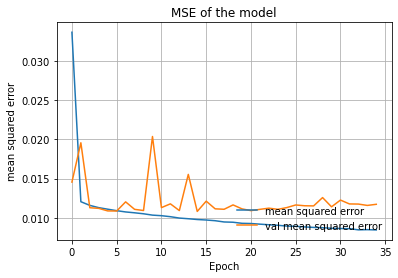

In [ ]:
plt.plot(history_E1.history['mse'], label='mean squared error')
plt.plot(history_E1.history['val_mse'], label = 'val mean squared error')
plt.xlabel('Epoch')
plt.ylabel('mean squared error')
plt.legend(loc='lower right')
plt.grid()
plt.title('MSE of the model')

# 2. Write a machine learning algorithm to determine the flavour of the neutrino

In [ ]:
files_e2=data_retriever(200)

In [ ]:
numu_counter = 0
nue_counter = 0
nutau_counter = 0
other_counter = 0

for filename in tqdm(files_e2):
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):

    if df['neutrino']['interaction'][i] <= 3:

      numu_counter= numu_counter + 1

    elif df['neutrino']['interaction'][i] > 4 and df['neutrino']['interaction'][i] <= 7:

      nue_counter= nue_counter + 1

    elif df['neutrino']['interaction'][i] > 7 and df['neutrino']['interaction'][i] <= 11:

      nutau_counter= nutau_counter + 1

    else:

      other_counter = other_counter + 1

totalevents = numu_counter + nue_counter + nutau_counter + other_counter

In [ ]:
## Displaying the number of events and its percentages

display(Math(r'There \; are \; {} \; \nu_\mu \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(numu_counter, round(((numu_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; \nu_\tau \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nutau_counter, round(((nutau_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; \nu_e \; charged-current \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(nue_counter, round(((nue_counter / totalevents ) * 100),2), len(files_e2))))
display(Math(r'There \; are \; {} \; other \; events. \; This \; represents \; {} \% \; of \; the \; events \; in \; {} \; meta \; data \; files.'.format(other_counter, round(((other_counter / totalevents ) * 100),2), len(files_e2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

As we can see from above there are no tau neutrinos, therefore this is just a binary classification where the network will be able to distinguish between electron and muon neutrinos. 

I am going to feed the network only with muon neutrino CC events and electron neutrino CC events (double check if this is the correct approach or I should include the rest of the data and make it like 0,1,2)

In [ ]:
files_e2_1=data_retriever(80)

In [ ]:
files_e2_80, files_e2_20 = train_test_split(files_e2_1, train_size = 0.99)

In [ ]:
e2_labels=[]
e2_input_1=[]
e2_input_2=[]

for filename in tqdm(files_e2_20):
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):
    if df['neutrino']['interaction'][i] <=3:  # this is for muon neutrinos, between 0-3
      model = df['cvnmap'][i].reshape((2,100,80))
      e2_input_1.append(model[0])
      e2_input_2.append(model[1])
      e2_labels.append(int(1)) # appending a 1 to the labels for muon neutrinos 

    else:
      pass

for filename in tqdm(files_e2_80):
  df=h5py.File(filename, 'r')
  for i in range(len(df['neutrino']['interaction'])):
    if df['neutrino']['interaction'][i] >=4 and df['neutrino']['interaction'][i] <= 7:  # this is for electron neutrinos, between 4-7
      model = df['cvnmap'][i].reshape((2,100,80))
      e2_input_1.append(model[0])
      e2_input_2.append(model[1])
      e2_labels.append(int(0)) # appending a 0 to the labels for electron neutrinos 

    else:
      pass



(array([6735.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6091.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

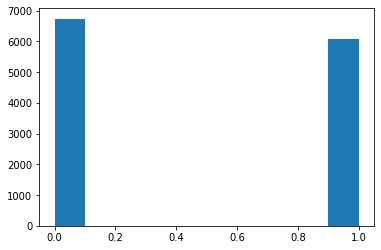

In [ ]:
# checking if the data is balanced

plt.hist(e2_labels)

As expected there are too many muon neutrino events, I need to balance it out as I did in task 1. 

In [ ]:
e2_labels, e2_input_1, e2_input_2 = shuffle_data(e2_labels, e2_input_1, e2_input_2)

In [ ]:
e2_input_1 = tf.expand_dims(e2_input_1, axis = 3)
e2_input_2 = tf.expand_dims(e2_input_2, axis = 3)

In [ ]:
train_input_1_e2, test_input_1_e2, val_input_1_e2, train_input_2_e2, test_input_2_e2, val_input_2_e2, train_labels_e2, val_labels_e2, test_labels_e2 = data(e2_input_1, e2_input_2, e2_labels)

In [ ]:
input_shape_e2=np.shape(e2_input_1)
xy_input = Input(shape=input_shape_e2[1:])
xy_model = create_convolution_layers_2(xy_input, input_shape_e2[1:])

yz_input = Input(shape=input_shape_e2[1:])
yz_model = create_convolution_layers_2(yz_input, input_shape_e2[1:])

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(32, activation = "relu")(conv)
dense = Dropout(0.5)(dense)
dense = Dense(64, activation = "relu")(dense)
dense = Dropout(0.5)(dense)
dense = Dense(32, activation = "relu")(dense)
dense = Dropout(0.5)(dense)

output = Dense(1, activation ="sigmoid")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy']) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 100, 80, 8)   80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 100, 80, 8)   80          input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_input_1_e2,train_input_2_e2],y=train_labels_e2, batch_size=64, epochs=50,validation_data=([val_input_1_e2,val_input_2_e2],val_labels_e2), callbacks =[earlystopping] )

Epoch 1/50
129/129 [==============================] - 3s 13ms/step - loss: 0.6786 - accuracy: 0.5383 - val_loss: 0.5839 - val_accuracy: 0.6720
Epoch 2/50
129/129 [==============================] - 1s 11ms/step - loss: 0.5773 - accuracy: 0.7061 - val_loss: 0.5275 - val_accuracy: 0.7096
Epoch 3/50
129/129 [==============================] - 1s 11ms/step - loss: 0.5360 - accuracy: 0.7252 - val_loss: 0.5074 - val_accuracy: 0.7237
Epoch 4/50
129/129 [==============================] - 1s 11ms/step - loss: 0.5220 - accuracy: 0.7296 - val_loss: 0.4936 - val_accuracy: 0.7471
Epoch 5/50
129/129 [==============================] - 1s 11ms/step - loss: 0.5156 - accuracy: 0.7412 - val_loss: 0.4691 - val_accuracy: 0.7607
Epoch 6/50
129/129 [==============================] - 1s 11ms/step - loss: 0.4773 - accuracy: 0.7647 - val_loss: 0.4947 - val_accuracy: 0.7568
Epoch 7/50
129/129 [==============================] - 1s 11ms/step - loss: 0.4696 - accuracy: 0.7823 - val_loss: 0.4542 - val_accuracy: 0.7880

In [ ]:
test_loss, test_acc = model.evaluate([test_input_1_e2,test_input_2_e2],  test_labels_e2, verbose=2)

81/81 - 0s - loss: 0.3890 - accuracy: 0.8270


Text(0.5, 1.0, 'Accuracy of model')

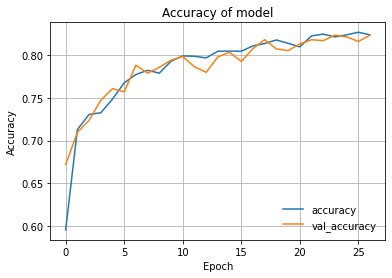

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')

# 3. Write a machine learning algorithm to determine $y=$ lepton energy over neutrino energy

In [ ]:
files_e3=data_retriever(200)

In [ ]:
# Finding max and min lepton energy over neutrino energy (y)

y_energy = [] # empty array for values of lepton energy over neutrino energy 

for filename in tqdm(files_e3):
  df=h5py.File(filename, 'r')

  for i in range(len(df['cvnmap'])):
    y = df['neutrino']['lepenergy'][i] / df['neutrino']['nuenergy'][i] 
    y_energy.append(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


I encountered an error dividing the values which means some of the energies, either lepton energy or neutrino energy have a value of 0. That is what I am finding in the code below. 

### What do neutrino energy and lepton energy refer to?
The neutrino energy refers to the true energy of the simulated incoming neutrino. When that neutrino interacts it will always produce a final-state lepton.
In the case of a neutral-current interaction, that lepton will be the scattered
neutrino. In the case of a charged-current interaction, it will be the neutrino’s
charged-lepton partner. Note that if the incoming particle is an antineutrino,
the outgoing lepton will also be an antiparticle. So an electron antineutrino ¯νe
undergoing a charged-current interaction will produce a positron e
+.

In [ ]:
# Finding what type of interactions have 0 lepton energy or neutrino energy. 

lep=[]
nu=[]
for filename in tqdm(files_e3):
  df=h5py.File(filename, 'r')

  for i in range(len(df['cvnmap'])):
    if df['neutrino']['lepenergy'][i] == 0:
      lep.append(df['neutrino']['interaction'][i])
    else:
      pass
  
  for i in range(len(df['cvnmap'])):
    if df['neutrino']['nuenergy'][i] == 0:
      nu.append(df['neutrino']['interaction'][i])
    else:
      pass

In [ ]:
nu.count(15)

11597

There is lepton and neutrino energy 0 for interaction number 15. These need to be excluded from my code because if not I get an error. 

In [ ]:
# Finding max and min lepton energy over neutrino energy (y)

y_energy = [] # empty array for values of lepton energy over neutrino energy 

for filename in tqdm(files_e3):
  df=h5py.File(filename, 'r')

  for i in range(len(df['cvnmap'])):
    if df['neutrino']['interaction'][i] < 15 or df['neutrino']['interaction'][i] == 16:
      y = df['neutrino']['lepenergy'][i] / df['neutrino']['nuenergy'][i] 
      y_energy.append(y)
    else:
      pass

In [ ]:
print('Maximum energy for y:', np.max(y_energy))
print('Minimum energy for y:', np.min(y_energy))

max = np.max(y_energy)

Maximum energy for y: 1.0226585
Minimum energy for y: 0.0007331721


In [ ]:
files_e3_2=data_retriever(5)

In [ ]:
# Finding max and min lepton energy over neutrino energy (y)

y_energy_labels = [] # empty array for values of lepton energy over neutrino energy 
y_energy_input_1=[]
y_energy_input_2=[]

for filename in tqdm(files_e3_2):
  df=h5py.File(filename, 'r')

  for i in range(len(df['cvnmap'])):
    if df['neutrino']['interaction'][i] < 15 or df['neutrino']['interaction'][i] == 16:
      y = df['neutrino']['lepenergy'][i] / df['neutrino']['nuenergy'][i] 
      y_energy_labels.append(y)
      model = df['cvnmap'][i].reshape((2,100,80))
      y_energy_input_1.append(model[0])
      y_energy_input_2.append(model[1])
    else:
      pass

In [ ]:
y_energy_labels=y_energy_labels/np.max(y_energy_labels)

In [ ]:
y_energy_input_1 = tf.expand_dims(y_energy_input_1, axis = 3)
y_energy_input_2 = tf.expand_dims(y_energy_input_2, axis = 3)

In [ ]:
print(np.shape(y_energy_labels))
print(np.shape(y_energy_input_1))
print(np.shape(y_energy_input_2))

(34513, 1)
(34513, 100, 80, 1)
(34513, 100, 80, 1)


In [ ]:
train_input_1_y_energy, test_input_1_y_energy, val_input_1_y_energy, train_input_2_y_energy, test_input_2_y_energy, val_input_2_y_energy, train_labels_y_energy, val_labels_y_energy, test_labels_y_energy = data(y_energy_input_1, y_energy_input_2, y_energy_labels)

In [ ]:
input_shape = np.shape(y_energy_input_1)

In [ ]:
xy_input = Input(shape=input_shape[1:])
xy_model = create_convolution_layers(xy_input, input_shape[1:])

yz_input = Input(shape=input_shape[1:])
yz_model = create_convolution_layers(yz_input, input_shape[1:])

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(128)(conv)

output = Dense(1, activation ="linear")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae' # mean absolute error
              , 'mse']) # mean squared error 

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 80, 8)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 80, 8)   80          input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
history_E3 = model.fit(x=[train_input_1_y_energy,train_input_2_y_energy],y=train_labels_y_energy, batch_size=32, epochs=35,validation_data=([val_input_1_y_energy,val_input_2_y_energy],val_labels_y_energy) )

Epoch 1/35
691/691 [==============================] - 14s 9ms/step - loss: 0.1498 - mae: 0.2669 - mse: 0.1498 - val_loss: 0.0582 - val_mae: 0.2035 - val_mse: 0.0582
Epoch 2/35
691/691 [==============================] - 6s 8ms/step - loss: 0.0551 - mae: 0.1935 - mse: 0.0551 - val_loss: 0.0667 - val_mae: 0.2050 - val_mse: 0.0667
Epoch 3/35
691/691 [==============================] - 6s 8ms/step - loss: 0.0507 - mae: 0.1853 - mse: 0.0507 - val_loss: 0.0475 - val_mae: 0.1817 - val_mse: 0.0475
Epoch 4/35
691/691 [==============================] - 6s 8ms/step - loss: 0.0489 - mae: 0.1824 - mse: 0.0489 - val_loss: 0.0500 - val_mae: 0.1875 - val_mse: 0.0500
Epoch 5/35
691/691 [==============================] - 6s 8ms/step - loss: 0.0477 - mae: 0.1797 - mse: 0.0477 - val_loss: 0.0474 - val_mae: 0.1801 - val_mse: 0.0474
Epoch 6/35
691/691 [==============================] - 6s 8ms/step - loss: 0.0470 - mae: 0.1783 - mse: 0.0470 - val_loss: 0.0497 - val_mae: 0.1870 - val_mse: 0.0497
Epoch 7/35
691/

Text(0.5, 1.0, 'MSE of the model')

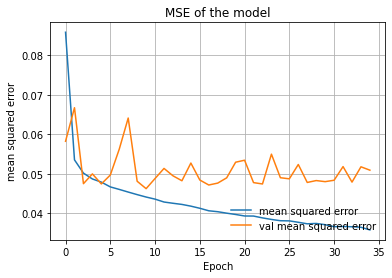

In [ ]:
plt.plot(history_E3.history['mse'], label='mean squared error')
plt.plot(history_E3.history['val_mse'], label = 'val mean squared error')
plt.xlabel('Epoch')
plt.ylabel('mean squared error')
plt.legend(loc='lower right')
plt.grid()
plt.title('MSE of the model')

# 4. Write a machine learning algorithm to determine the number of protons or pions

In this step we need to separate the CC νe events from the NC RES and NC DIS events. The
primary particles that are commonly produced in the neutral current resonant and deep inelastic
scattering modes are: protons, neutrons, charged pions, neutral pions and photons. 

The protons are typically produced with an energy in the 0.94 GeV – 2.00 GeV range. The proton
track is straight and highly ionizing, with energy deposition of 80 to 100 ADC units. Having a small
momentum, the proton track does not extend for more than 100 wires, and exhibits the characteristic
properties of a stopping particle, with an energy deposition at the end of the track being in the interval
200 – 300 ADC units. Therefore, it is relatively easy to differentiate between protons and muons.


With “hits” reconstructed, more complex objects can be formed by grouping hits
based on particle topology. Particle topology can be track-like (e.g. muons, protons,
charged pions, etc.) or shower-like (e.g. electrons and photons), as seen in Figure 27. The reconstruction of these 2 topologies has involved considerable effort and a
variety of different approaches.

The majority of νe contamination in the current sample have a candidate track
produced by a proton rather than a muon (Figure 57a). Protons are shorter than
muons and also highly ionizing while muons are minimally ionizing. 

https://lss.fnal.gov/archive/thesis/2000/fermilab-thesis-2018-04.pdf


Neutrinos for the NOvA experiments comes from decay of pions and kaons.

https://inspirehep.net/files/5fadd35ad166d500e8ae59ea4a96f12b


I literally do not know what to do :(

# 5. Write a machine learning algorithm to determine the interaction mode.

In [10]:
files_5=data_retriever(15)

In [13]:
int_mode_labels=[]

for filename in tqdm(files_5):
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):

    if (df['neutrino']['interaction'][i]) == 0 or (df['neutrino']['interaction'][i]) == 4 or (df['neutrino']['interaction'][i]) == 8:
      int_mode_labels.append(int(0)) # appending 0 for CC QE events

    elif (df['neutrino']['interaction'][i]) == 1 or (df['neutrino']['interaction'][i]) == 5 or (df['neutrino']['interaction'][i]) == 9:
      int_mode_labels.append(int(1)) # appending 1 for CC RES events  
    
    elif (df['neutrino']['interaction'][i]) == 2 or (df['neutrino']['interaction'][i]) == 6 or (df['neutrino']['interaction'][i]) == 10:
      int_mode_labels.append(int(2)) # appending 2 for CC DIS events  

    elif (df['neutrino']['interaction'][i]) == 3 or (df['neutrino']['interaction'][i]) == 7 or (df['neutrino']['interaction'][i]) == 11:
      int_mode_labels.append(int(3)) # appending 3 for CC other events 

    elif (df['neutrino']['interaction'][i]) == 12 or (df['neutrino']['interaction'][i]) == 13:
      int_mode_labels.append(int(4)) # appending 4 for NC events

    else:
      pass 

(array([13043.,     0., 19820.,     0.,     0., 56968.,     0.,  2964.,
            0., 10271.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

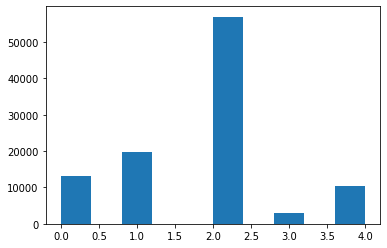

In [14]:
plt.hist(int_mode_labels)

In [18]:
files_5=data_retriever(20)

In [19]:
files_5_80, files_5_20 = train_test_split(files_5, train_size = 0.8, shuffle = False)
files_5_95, files_5_05 = train_test_split(files_5, train_size = 0.95, shuffle = False)
files_5_75, files_5_25 = train_test_split(files_5, train_size = 0.75, shuffle = False)

In [22]:
int_mode_labels_b=[]
int_mode_input_1=[]
int_mode_input_2=[]

for filename in tqdm(files_5_25): # using 0-4 files 
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):

    if (df['neutrino']['interaction'][i]) == 0 or (df['neutrino']['interaction'][i]) == 4 or (df['neutrino']['interaction'][i]) == 8:
      model = df['cvnmap'][i].reshape((2,100,80))
      int_mode_input_1.append(model[0])
      int_mode_input_2.append(model[1])
      int_mode_labels_b.append(int(0)) # appending 0 for CC QE events

    else:
      pass

for filename in tqdm(files_5_20): # using 0-3 files 
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):

    if (df['neutrino']['interaction'][i]) == 1 or (df['neutrino']['interaction'][i]) == 5 or (df['neutrino']['interaction'][i]) == 9:
      int_mode_labels_b.append(int(1)) # appending 1 for CC RES events 
      model = df['cvnmap'][i].reshape((2,100,80))
      int_mode_input_1.append(model[0])
      int_mode_input_2.append(model[1])

    else:
      pass

for filename in tqdm(files_5_05): # using 0-1 files 
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])): 
    
    if (df['neutrino']['interaction'][i]) == 2 or (df['neutrino']['interaction'][i]) == 6 or (df['neutrino']['interaction'][i]) == 10:
      int_mode_labels_b.append(int(2)) # appending 2 for CC DIS events  
      model = df['cvnmap'][i].reshape((2,100,80))
      int_mode_input_1.append(model[0])
      int_mode_input_2.append(model[1])

    else:
      pass

for filename in tqdm(files_5): # using 0-15 files 
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):

    if (df['neutrino']['interaction'][i]) == 3 or (df['neutrino']['interaction'][i]) == 7 or (df['neutrino']['interaction'][i]) == 11:
      int_mode_labels_b.append(int(3)) # appending 3 for CC other events 
      model = df['cvnmap'][i].reshape((2,100,80))
      int_mode_input_1.append(model[0])
      int_mode_input_2.append(model[1])

    else:
      pass

for filename in tqdm(files_5_25): # using 0-4 files 
  df=h5py.File(filename, 'r')

  for i in range(len(df['neutrino']['interaction'])):

    if (df['neutrino']['interaction'][i]) == 12 or (df['neutrino']['interaction'][i]) == 13:
      int_mode_labels_b.append(int(4)) # appending 4 for NC events
      model = df['cvnmap'][i].reshape((2,100,80))
      int_mode_input_1.append(model[0])
      int_mode_input_2.append(model[1])
      
    else:
      pass 

(array([4585.,    0., 5293.,    0.,    0., 3673.,    0., 3937.,    0.,
        3354.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

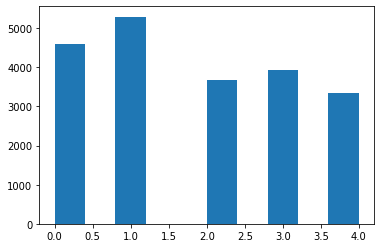

In [21]:
plt.hist(int_mode_labels_b)

In [23]:
int_mode_labels_b, int_mode_input_1, int_mode_input_2 = shuffle_data(int_mode_labels_b, int_mode_input_1, int_mode_input_2)

In [24]:
int_mode_input_1 = tf.expand_dims(int_mode_input_1, axis = 3)
int_mode_input_2 = tf.expand_dims(int_mode_input_2, axis = 3)

In [25]:
train_int_mode_input_1, test_int_mode_input_1, val_int_mode_input_1, train_int_mode_input_2, test_int_mode_input_2, val_int_mode_input_2, train_int_mode_labels_b, val_int_mode_labels_b, test_int_mode_labels_b = data(int_mode_input_1, int_mode_input_2, int_mode_labels_b)

In [27]:
input_shape_e5=np.shape(int_mode_input_1)

In [28]:
xy_input = Input(shape=input_shape_e5[1:])
xy_model = create_convolution_layers_2(xy_input, input_shape_e5[1:])

yz_input = Input(shape=input_shape_e5[1:])
yz_model = create_convolution_layers_2(yz_input, input_shape_e5[1:])

conv = concatenate([xy_model, yz_model])
conv = Flatten()(conv)

dense = Dense(32, activation = "relu")(conv)
dense = Dropout(0.5)(dense)
dense = Dense(64, activation = "relu")(dense)
dense = Dropout(0.5)(dense)
dense = Dense(32, activation = "relu")(dense)
dense = Dropout(0.5)(dense)

output = Dense(1, activation ="sigmoid")(dense)

model = Model(inputs = [xy_input, yz_input], outputs = [output])


model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy']) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 80, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 80, 8)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 80, 8)   80          input_2[0][0]                    
______________________________________________________________________________________________

In [29]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True) 

history = model.fit(x=[train_int_mode_input_1,train_int_mode_input_2],y=train_int_mode_labels_b, batch_size=64, epochs=50,validation_data=([val_int_mode_input_1,val_int_mode_input_2],val_int_mode_labels_b), callbacks =[earlystopping] )

Epoch 1/50
209/209 [==============================] - 11s 15ms/step - loss: -42927123.9411 - accuracy: 0.2551 - val_loss: -4295270912.0000 - val_accuracy: 0.2504
Epoch 2/50
209/209 [==============================] - 3s 14ms/step - loss: -99003362724.5714 - accuracy: 0.2617 - val_loss: -1909172207616.0000 - val_accuracy: 0.2504
Epoch 3/50
209/209 [==============================] - 3s 14ms/step - loss: -6912742084725.0283 - accuracy: 0.2503 - val_loss: -48676240097280.0000 - val_accuracy: 0.2504
Epoch 4/50
209/209 [==============================] - 3s 14ms/step - loss: -102289916456999.0156 - accuracy: 0.2501 - val_loss: -415624454995968.0000 - val_accuracy: 0.2504
Epoch 5/50
209/209 [==============================] - 3s 14ms/step - loss: -689979639493895.3750 - accuracy: 0.2586 - val_loss: -2040107586551808.0000 - val_accuracy: 0.2504
Epoch 6/50
209/209 [==============================] - 3s 14ms/step - loss: -3020416013236399.5000 - accuracy: 0.2523 - val_loss: -7152385415708672.0000 - 

In [30]:
test_loss, test_acc = model.evaluate([test_int_mode_input_1,test_int_mode_input_2],  test_int_mode_labels_b, verbose=2)

131/131 - 1s - loss: -1.1438e+21 - accuracy: 0.2535


Text(0.5, 1.0, 'Accuracy of model')

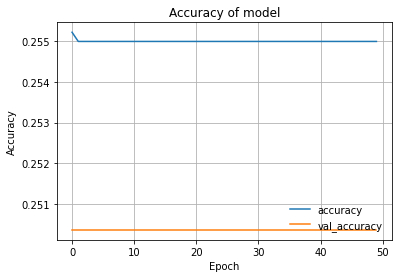

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Accuracy of model')